In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

C:\Users\ishan\anaconda3\envs\DAB200\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Nursin Unit - CC3_HDG

In [2]:
# Load the data into a pandas dataframe
CC3_HDG = pd.read_excel("hospital_data.xlsx")

In [3]:
CC3_HDG['Number of Patients'] = CC3_HDG['Number of Patients'].fillna(0)
CC3_HDG['Number of New Admissions'] = CC3_HDG['Number of New Admissions'].fillna(0)

In [4]:
# Create new columns for the total treatment time and new admission time required per day (in hours)
CC3_HDG["Total Treatment Time"] = CC3_HDG["Number of Patients"] * 0.5
CC3_HDG["New Admission Time"] = CC3_HDG["Number of New Admissions"] * 0.75

In [5]:
# Convert the 'Census Day' column to datetime objects
CC3_HDG['Census Day'] = pd.to_datetime(CC3_HDG['Census Day'])

In [6]:
# Define the feature and target variables
X = CC3_HDG.drop(["Number of Patients", "Number of New Admissions", "Total Treatment Time", "New Admission Time"], axis=1)  # Use only the date column as feature
y = (CC3_HDG["Total Treatment Time"] + CC3_HDG["New Admission Time"])/(7.5)

In [7]:
# Extract the ordinal value of the dates and store them in a numpy array
X = np.array([day.toordinal() for day in CC3_HDG['Census Day']])

In [8]:
# Reshape the input X to a 2D array with a single feature column
X = X.reshape(-1, 1)

In [9]:
# Create a linear regression model and fit it to the data
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [10]:
# Make predictions on the training data
y_pred = lr.predict(X)

# Calculate the mean squared error
mse = mean_squared_error(y, y_pred)

# Print the coefficients and intercept of the linear regression model
print("Coefficients:", lr.coef_)
print("Intercept:", lr.intercept_)

Coefficients: [0.00086103]
Intercept: -634.3594770533754


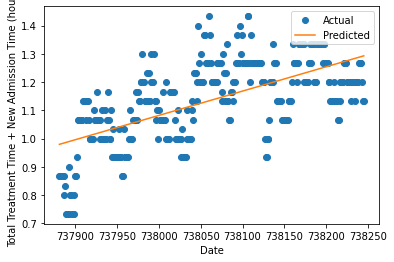

In [11]:
# Plot the actual vs. predicted values
plt.plot(X, y, "o", label="Actual")
plt.plot(X, y_pred, label="Predicted")
plt.xlabel("Date")
plt.ylabel("Total Treatment Time + New Admission Time (hours)")
plt.legend()
plt.show()

In [12]:
avg_pred = np.mean(y_pred)

print("Average of predicted doctors required for CC3_HDG department is:", avg_pred)

Average of predicted doctors required for CC3_HDG department is: 1.1364383561643667


## Gradient Boosting Model

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

In [14]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [15]:
gb = GradientBoostingRegressor(n_estimators=500, learning_rate=0.05, max_depth=1, random_state=100, loss='squared_error')
gb.fit(X_train, y_train)

# Make predictions on the training data
y_pred_gb = gb.predict(X_test)

# Calculate the mean squared error
mse_gb = mean_squared_error(y_test, y_pred_gb)

In [16]:
# Print the coefficients and intercept of the linear regression model
print("Mean Squared Error:", mse_gb)
print("Accuracy:", gb.score(X_train, y_train))

Mean Squared Error: 0.00516612895781638
Accuracy: 0.7299654779328992


In [17]:
gb.score(X_test, y_test)

0.7213720273645149

In [18]:
print("Predicted values:", y_pred_gb)

Predicted values: [1.19184609 1.22279118 1.027733   1.06989719 1.03598902 1.24726465
 1.24726465 1.10942726 1.09113785 1.23333174 1.10942726 1.10942726
 1.027733   1.22279118 1.16011346 1.24726465 1.24726465 0.82445578
 1.06989719 1.01135326 1.027733   1.027733   1.09113785 1.027733
 1.23333174 1.22279118 1.01135326 1.10942726 0.82445578 1.24726465
 1.23333174 1.16011346 1.19184609 1.08567853 1.027733   1.01135326
 1.19184609 1.13395434 1.01135326 1.08567853 1.08567853 1.19184609
 1.19184609 1.24726465 1.24726465 1.10942726 1.01135326 1.22279118
 1.22279118 1.10942726 1.08567853 1.01135326 1.027733   1.19184609
 1.16011346 1.09113785 1.027733   1.24726465 1.01135326 1.027733
 1.23333174 1.22279118 1.10942726 1.23333174 1.22279118 1.22279118
 1.23333174 1.20173753 1.19184609 1.027733   1.08567853 1.22279118
 0.81285805]


In [19]:
# Calculate the overall average number of doctors required
avg_doctors_required = np.mean(y_pred_gb)

print("Overall average number of doctors required for CC3_HDG department:", avg_doctors_required)

Overall average number of doctors required for CC3_HDG department: 1.123347068666334


In [20]:
from sklearn.model_selection import GridSearchCV

grid = {

    'learning_rate':[0.01,0.05,0.1],

    'n_estimators':np.arange(100,500,100),

}


gb = GradientBoostingRegressor()

gb_cv = GridSearchCV(gb, grid, cv = 4)

gb_cv.fit(X_train,y_train)

print("Best Parameters:",gb_cv.best_params_)

print("Train Score:",gb_cv.best_score_)

print("Test Score:",gb_cv.score(X_test,y_test))

Best Parameters: {'learning_rate': 0.1, 'n_estimators': 100}
Train Score: 0.785205759565836
Test Score: 0.8256051545297987


In [21]:
print("Accuracy:", gb_cv.score(X_train, y_train))
print("SCore:", gb_cv.score(X_test, y_test))

Accuracy: 0.9342757205718003
SCore: 0.8256051545297987


# Nursing Unit - CC4_HDG

In [22]:
# Load the data into a pandas dataframe
CC4_HDG = pd.read_excel("hospital_data_CC4_HDG.xlsx")

In [23]:
CC4_HDG['Number of Patients'] = CC4_HDG['Number of Patients'].fillna(0)
CC4_HDG['Number of New Admissions'] = CC4_HDG['Number of New Admissions'].fillna(0)

In [24]:
# Create new columns for the total treatment time and new admission time required per day (in hours)
CC4_HDG["Total Treatment Time"] = CC4_HDG["Number of Patients"] * 0.5
CC4_HDG["New Admission Time"] = CC4_HDG["Number of New Admissions"] * 0.75

In [25]:
# Convert the 'Census Day' column to datetime objects
CC4_HDG['Census Day'] = pd.to_datetime(CC4_HDG['Census Day'])

In [26]:
CC4_HDG

,Census Day,Number of Patients,Number of New Admissions,Total Treatment Time,New Admission Time
0,2021-04-01,15,0.0,7.5,0.0
1,2021-04-02,15,0.0,7.5,0.0
2,2021-04-03,15,0.0,7.5,0.0
3,2021-04-04,15,0.0,7.5,0.0
4,2021-04-05,15,0.0,7.5,0.0
...,...,...,...,...,...
360,2022-03-27,15,0.0,7.5,0.0
361,2022-03-28,15,0.0,7.5,0.0
362,2022-03-29,16,0.0,8.0,0.0
363,2022-03-30,16,0.0,8.0,0.0


In [27]:
# Define the feature and target variables
X1 = CC4_HDG.drop(["Number of Patients", "Number of New Admissions", "Total Treatment Time", "New Admission Time"], axis=1)  # Use only the date column as feature
y1 = (CC4_HDG["Total Treatment Time"] + CC4_HDG["New Admission Time"])/(7.5)

In [28]:
# Extract the ordinal value of the dates and store them in a numpy array
X1 = np.array([day.toordinal() for day in CC4_HDG['Census Day']])

In [29]:
# Reshape the input X to a 2D array with a single feature column
X1 = X1.reshape(-1, 1)

In [30]:
# Create a linear regression model and fit it to the data
lr1 = LinearRegression()
lr1.fit(X1, y1)

LinearRegression()

In [31]:
# Make predictions on the training data
y_pred1 = lr1.predict(X1)

# Calculate the mean squared error
mse1 = mean_squared_error(y1, y_pred1)

# Print the coefficients and intercept of the linear regression model
print("Coefficients:", lr1.coef_)
print("Intercept:", lr1.intercept_)

Coefficients: [0.00060657]
Intercept: -446.5726273599143


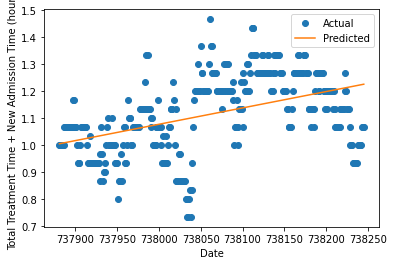

In [32]:
# Plot the actual vs. predicted values
plt.plot(X1, y1, "o", label="Actual")
plt.plot(X1, y_pred1, label="Predicted")
plt.xlabel("Date")
plt.ylabel("Total Treatment Time + New Admission Time (hours)")
plt.legend()
plt.show()

In [33]:
avg_pred1 = np.mean(y_pred1)

print("Average of predicted doctors required for CC4_HDG department is:", avg_pred1)

Average of predicted doctors required for CC4_HDG department is: 1.1152511415525126


## Gradient Boosting Model

In [34]:
# Split the data into training and testing sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2)

In [35]:
gb1 = GradientBoostingRegressor(n_estimators=500, learning_rate=0.05, max_depth=1, random_state=100, loss='squared_error')
gb1.fit(X_train1, y_train1)

# Make predictions on the training data
y_pred_gb1 = gb1.predict(X_test1)

# Calculate the mean squared error
mse_gb1 = mean_squared_error(y_test1, y_pred_gb1)

In [36]:
# Print the coefficients and intercept of the linear regression model
print("Mean Squared Error:", mse_gb1)
print("Accuracy:", gb1.score(X_train1, y_train1))

Mean Squared Error: 0.005019233071503423
Accuracy: 0.6954044059790923


In [37]:
gb1.score(X_test1, y_test1)

0.7456817979395118

In [38]:
print("Predicted values:", y_pred_gb1)

Predicted values: [1.06019497 0.99102574 1.05473044 1.06019497 1.2184323  1.03796885
 1.05473044 1.2184323  1.21535702 1.2184323  1.01634012 1.06019497
 1.2184323  0.99102574 1.21535702 1.21535702 0.99102574 1.19739605
 0.99102574 1.01634012 1.25514889 0.99102574 0.99102574 0.95651075
 1.19739605 0.95651075 0.95651075 0.99885173 1.20084965 0.95651075
 0.99102574 1.21535702 1.25514889 1.2184323  1.25514889 0.99102574
 1.21535702 1.03796885 1.06019497 1.19739605 1.06019497 1.02043833
 1.2184323  0.99102574 0.99102574 1.06019497 1.19739605 1.01634012
 1.06019497 0.99885173 1.25514889 1.2184323  1.21535702 1.19392521
 1.2184323  1.19392521 1.14297364 1.25514889 1.14297364 1.2184323
 1.19739605 1.06687957 1.21535702 1.2184323  1.19739605 0.99102574
 1.05473044 0.99885173 1.19739605 1.2184323  1.21535702 1.21535702
 1.14297364]


In [39]:
# Calculate the overall average number of doctors required
avg_doctors_required1 = np.mean(y_pred_gb1)

print("Overall average number of doctors required for CC4_HDG department:", avg_doctors_required1)

Overall average number of doctors required for CC4_HDG department: 1.1169564328371873


In [40]:
from sklearn.model_selection import GridSearchCV

grid = {

    'learning_rate':[0.01,0.05,0.1],

    'n_estimators':np.arange(100,500,100),

}


gb1 = GradientBoostingRegressor()

gb_cv1 = GridSearchCV(gb1, grid, cv = 4)

gb_cv1.fit(X_train1,y_train1)

print("Best Parameters:",gb_cv1.best_params_)

print("Train Score:",gb_cv1.best_score_)

print("Test Score:",gb_cv1.score(X_test1,y_test1))

Best Parameters: {'learning_rate': 0.05, 'n_estimators': 400}
Train Score: 0.8377564248730909
Test Score: 0.8690965331740891


In [41]:
print("Accuracy:", gb_cv1.score(X_train1, y_train1))
print("SCore:", gb_cv1.score(X_test1, y_test1))

Accuracy: 0.9702100661535358
SCore: 0.8690965331740891


# Nursing Unit - CC5_HDG

In [42]:
# Load the data into a pandas dataframe
CC5_HDG = pd.read_excel("hospital_data_CC5_HDG.xlsx")

In [43]:
CC5_HDG['Number of Patients'] = CC5_HDG['Number of Patients'].fillna(0)
CC5_HDG['Number of New Admissions'] = CC5_HDG['Number of New Admissions'].fillna(0)

In [44]:
# Create new columns for the total treatment time and new admission time required per day (in hours)
CC5_HDG["Total Treatment Time"] = CC5_HDG["Number of Patients"] * 0.5
CC5_HDG["New Admission Time"] = CC5_HDG["Number of New Admissions"] * 0.75

In [45]:
# Convert the 'Census Day' column to datetime objects
CC5_HDG['Census Day'] = pd.to_datetime(CC5_HDG['Census Day'])

In [46]:
# Define the feature and target variables
X2 = CC5_HDG.drop(["Number of Patients", "Number of New Admissions", "Total Treatment Time", "New Admission Time"], axis=1)  # Use only the date column as feature
y2 = (CC5_HDG["Total Treatment Time"] + CC5_HDG["New Admission Time"])/(7.5)

In [47]:
# Extract the ordinal value of the dates and store them in a numpy array
X2 = np.array([day.toordinal() for day in CC5_HDG['Census Day']])

In [48]:
# Reshape the input X to a 2D array with a single feature column
X2 = X2.reshape(-1, 1)

In [49]:
# Create a linear regression model and fit it to the data
lr2 = LinearRegression()
lr2.fit(X2, y2)

LinearRegression()

In [50]:
# Make predictions on the training data
y_pred2 = lr2.predict(X2)

# Calculate the mean squared error
mse2 = mean_squared_error(y2, y_pred2)

# Print the coefficients and intercept of the linear regression model
print("Coefficients:", lr2.coef_)
print("Intercept:", lr2.intercept_)

Coefficients: [0.00020445]
Intercept: -149.70451935518614


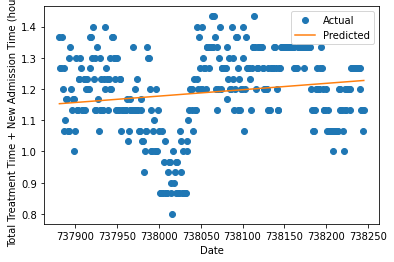

In [51]:
# Plot the actual vs. predicted values
plt.plot(X2, y2, "o", label="Actual")
plt.plot(X2, y_pred2, label="Predicted")
plt.xlabel("Date")
plt.ylabel("Total Treatment Time + New Admission Time (hours)")
plt.legend()
plt.show()

In [52]:
avg_pred2 = np.mean(y_pred2)

print("Average of predicted doctors required for CC5_HDG department is:", avg_pred2)

Average of predicted doctors required for CC5_HDG department is: 1.190319634703199


## Gradient Boosting Model

In [53]:
# Split the data into training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2)

In [54]:
gb2 = GradientBoostingRegressor(n_estimators=500, learning_rate=0.05, max_depth=1, random_state=100, loss='squared_error')
gb2.fit(X_train2, y_train2)

# Make predictions on the training data
y_pred_gb2 = gb2.predict(X_test2)

# Calculate the mean squared error
mse_gb2 = mean_squared_error(y_test2, y_pred_gb2)

In [55]:
# Print the coefficients and intercept of the linear regression model
print("Mean Squared Error:", mse_gb2)
print("Accuracy:", gb2.score(X_train2, y_train2))

Mean Squared Error: 0.00719535186118901
Accuracy: 0.6750067584596102


In [56]:
gb2.score(X_test2, y_test2)

0.5341950292707309

In [57]:
print("Predicted values:", y_pred_gb2)

Predicted values: [1.26370966 1.19251926 1.21870916 1.11008049 1.21870916 1.26370966
 1.26370966 1.13671246 1.21683909 1.26370966 1.13437519 1.19120995
 1.26370966 1.26370966 1.26370966 1.27925192 1.11008049 1.14120758
 1.20747491 1.19251926 0.97709679 1.19120995 1.26370966 1.27925192
 1.26370966 1.21870916 1.21870916 1.16741074 1.26370966 1.21870916
 1.21870916 1.14120758 1.26370966 1.26370966 1.14120758 1.19251926
 1.26370966 1.21870916 1.27925192 1.19120995 0.97709679 1.27925192
 1.17399473 1.27925192 1.26370966 1.20747491 1.21870916 1.20747491
 1.21870916 1.26370966 1.11008049 1.20587372 1.26370966 1.0708562
 0.97709679 1.17399473 1.20747491 1.21870916 1.27903483 0.97709679
 1.21870916 1.19120995 1.21870916 1.19251926 1.14120758 1.21870916
 1.17399473 1.27925192 1.14120758 1.14120758 1.26370966 1.27925192
 1.26370966]


In [58]:
# Calculate the overall average number of doctors required
avg_doctors_required2 = np.mean(y_pred_gb2)

print("Overall average number of doctors required for CC5_HDG department:", avg_doctors_required2)

Overall average number of doctors required for CC5_HDG department: 1.2017607315891392


In [59]:
from sklearn.model_selection import GridSearchCV

grid = {

    'learning_rate':[0.01,0.05,0.1],

    'n_estimators':np.arange(100,500,100),

}


gb2 = GradientBoostingRegressor()

gb_cv2 = GridSearchCV(gb2, grid, cv = 4)

gb_cv2.fit(X_train2,y_train2)

print("Best Parameters:",gb_cv2.best_params_)

print("Train Score:",gb_cv2.best_score_)

print("Test Score:",gb_cv2.score(X_test2,y_test2))

Best Parameters: {'learning_rate': 0.1, 'n_estimators': 100}
Train Score: 0.6579733315801897
Test Score: 0.5938301405879922


In [60]:
print("Accuracy:", gb_cv2.score(X_train2, y_train2))
print("SCore:", gb_cv2.score(X_test2, y_test2))

Accuracy: 0.86000796084639
SCore: 0.5938301405879922


# Nursing Unit - CC6_HDG

In [61]:
# Load the data into a pandas dataframe
CC6_HDG = pd.read_excel("hospital_data_CC6_HDG.xlsx")

In [62]:
CC6_HDG['Number of Patients'] = CC6_HDG['Number of Patients'].fillna(0)
CC6_HDG['Number of New Admissions'] = CC6_HDG['Number of New Admissions'].fillna(0)

In [63]:
# Create new columns for the total treatment time and new admission time required per day (in hours)
CC6_HDG["Total Treatment Time"] = CC6_HDG["Number of Patients"] * 0.5
CC6_HDG["New Admission Time"] = CC6_HDG["Number of New Admissions"] * 0.75

In [64]:
# Convert the 'Census Day' column to datetime objects
CC6_HDG['Census Day'] = pd.to_datetime(CC6_HDG['Census Day'])

In [65]:
# Define the feature and target variables
X3 = CC6_HDG.drop(["Number of Patients", "Number of New Admissions", "Total Treatment Time", "New Admission Time"], axis=1)  # Use only the date column as feature
y3 = (CC6_HDG["Total Treatment Time"] + CC6_HDG["New Admission Time"])/(7.5)

In [66]:
# Extract the ordinal value of the dates and store them in a numpy array
X3 = np.array([day.toordinal() for day in CC6_HDG['Census Day']])

In [67]:
# Reshape the input X to a 2D array with a single feature column
X3 = X3.reshape(-1, 1)

In [68]:
# Create a linear regression model and fit it to the data
lr3 = LinearRegression()
lr3.fit(X3, y3)

LinearRegression()

In [69]:
# Make predictions on the training data
y_pred3 = lr3.predict(X3)

# Calculate the mean squared error
mse3 = mean_squared_error(y3, y_pred3)

# Print the coefficients and intercept of the linear regression model
print("Coefficients:", lr3.coef_)
print("Intercept:", lr3.intercept_)

Coefficients: [0.00093424]
Intercept: -688.5113159009564


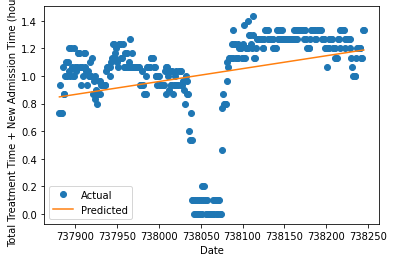

In [70]:
# Plot the actual vs. predicted values
plt.plot(X3, y3, "o", label="Actual")
plt.plot(X3, y_pred3, label="Predicted")
plt.xlabel("Date")
plt.ylabel("Total Treatment Time + New Admission Time (hours)")
plt.legend()
plt.show()

In [71]:
avg_pred3 = np.mean(y_pred3)

print("Average of predicted doctors required for CC6_HDG department is:", avg_pred3)

Average of predicted doctors required for CC6_HDG department is: 1.018721461187225


## Gradient Boosting Model

In [72]:
# Split the data into training and testing sets
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2)

In [73]:
gb3 = GradientBoostingRegressor(n_estimators=500, learning_rate=0.05, max_depth=1, random_state=100, loss='squared_error')
gb3.fit(X_train3, y_train3)

# Make predictions on the training data
y_pred_gb3 = gb3.predict(X_test3)

# Calculate the mean squared error
mse_gb3 = mean_squared_error(y_test3, y_pred_gb3)

In [74]:
# Print the coefficients and intercept of the linear regression model
print("Mean Squared Error:", mse_gb3)
print("Accuracy:", gb3.score(X_train3, y_train3))

Mean Squared Error: 0.009116653861208858
Accuracy: 0.934472487514438


In [75]:
gb3.score(X_test3, y_test3)

0.9323147765872485

In [76]:
print("Predicted values:", y_pred_gb3)

Predicted values: [1.244323   0.99727815 1.244323   1.244323   1.21810316 1.244323
 0.99468495 1.03015883 0.94805948 1.244323   1.03015883 1.244323
 1.244323   0.18134192 1.03015883 1.03015883 0.18134192 1.03015883
 1.244323   1.244323   0.99727815 1.244323   1.244323   0.97360355
 1.03015883 1.244323   0.99727815 1.03015883 1.03015883 1.03015883
 0.18134192 1.03015883 0.95495418 0.18134192 1.03015883 1.03015883
 0.18134192 1.244323   1.03015883 1.03015883 1.244323   0.91407216
 1.244323   1.244323   1.244323   0.97360355 0.99727815 1.244323
 1.244323   1.21810316 0.95495418 1.244323   0.18134192 1.03015883
 1.244323   0.97360355 1.244323   1.244323   1.244323   1.03015883
 1.03015883 1.21810316 1.03015883 1.03015883 1.03015883 0.18134192
 0.99468495 1.244323   1.03015883 0.99727815 1.244323   1.244323
 0.18134192]


In [77]:
# Calculate the overall average number of doctors required
avg_doctors_required3 = np.mean(y_pred_gb3)

print("Overall average number of doctors required for CC6_HDG department:", avg_doctors_required3)

Overall average number of doctors required for CC6_HDG department: 1.0137494880773337


In [78]:
from sklearn.model_selection import GridSearchCV

grid = {

    'learning_rate':[0.01,0.05,0.1],

    'n_estimators':np.arange(100,500,100),

}


gb3 = GradientBoostingRegressor()

gb_cv3 = GridSearchCV(gb3, grid, cv = 4)

gb_cv3.fit(X_train3,y_train3)

print("Best Parameters:",gb_cv3.best_params_)

print("Train Score:",gb_cv3.best_score_)

print("Test Score:",gb_cv3.score(X_test3,y_test3))

Best Parameters: {'learning_rate': 0.05, 'n_estimators': 100}
Train Score: 0.9309754008205903
Test Score: 0.9690689383338473


In [79]:
print("Accuracy:", gb_cv3.score(X_train3, y_train3))
print("SCore:", gb_cv3.score(X_test3, y_test3))

Accuracy: 0.9724651630004384
SCore: 0.9690689383338473


# Nursing Unit - CC7_HDG

In [80]:
# Load the data into a pandas dataframe
CC7_HDG = pd.read_excel("hospital_data_CC7_HDG.xlsx")

In [81]:
CC7_HDG['Number of Patients'] = CC7_HDG['Number of Patients'].fillna(0)
CC7_HDG['Number of New Admissions'] = CC7_HDG['Number of New Admissions'].fillna(0)

In [82]:
# Create new columns for the total treatment time and new admission time required per day (in hours)
CC7_HDG["Total Treatment Time"] = CC7_HDG["Number of Patients"] * 0.5
CC7_HDG["New Admission Time"] = CC7_HDG["Number of New Admissions"] * 0.75

In [83]:
# Convert the 'Census Day' column to datetime objects
CC7_HDG['Census Day'] = pd.to_datetime(CC7_HDG['Census Day'])

In [84]:
# Define the feature and target variables
X4 = CC7_HDG.drop(["Number of Patients", "Number of New Admissions", "Total Treatment Time", "New Admission Time"], axis=1)  # Use only the date column as feature
y4 = (CC7_HDG["Total Treatment Time"] + CC7_HDG["New Admission Time"])/(7.5)

In [85]:
# Extract the ordinal value of the dates and store them in a numpy array
X4 = np.array([day.toordinal() for day in CC7_HDG['Census Day']])

In [86]:
# Reshape the input X to a 2D array with a single feature column
X4 = X4.reshape(-1, 1)

In [87]:
# Create a linear regression model and fit it to the data
lr4 = LinearRegression()
lr4.fit(X4, y4)

LinearRegression()

In [88]:
# Make predictions on the training data
y_pred4 = lr4.predict(X4)

# Calculate the mean squared error
mse4 = mean_squared_error(y4, y_pred4)

# Print the coefficients and intercept of the linear regression model
print("Coefficients:", lr4.coef_)
print("Intercept:", lr4.intercept_)

Coefficients: [0.00063363]
Intercept: -466.4994588247293


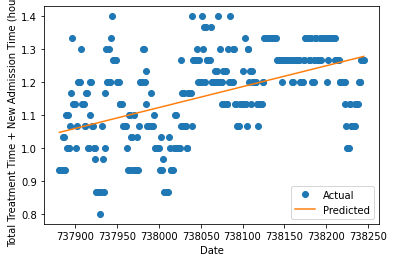

In [89]:
# Plot the actual vs. predicted values
plt.plot(X4, y4, "o", label="Actual")
plt.plot(X4, y_pred4, label="Predicted")
plt.xlabel("Date")
plt.ylabel("Total Treatment Time + New Admission Time (hours)")
plt.legend()
plt.show()

In [90]:
avg_pred4 = np.mean(y_pred4)

print("Average of predicted doctors required for CC7_HDG department is:", avg_pred4)

Average of predicted doctors required for CC7_HDG department is: 1.1628310502282884


## Gradient Boosting Model

In [91]:
# Split the data into training and testing sets
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.2)

In [92]:
gb4 = GradientBoostingRegressor(n_estimators=500, learning_rate=0.05, max_depth=1, random_state=100, loss='squared_error')
gb4.fit(X_train4, y_train4)

# Make predictions on the training data
y_pred_gb4 = gb4.predict(X_test4)

# Calculate the mean squared error
mse_gb4 = mean_squared_error(y_test4, y_pred_gb4)

In [93]:
# Print the coefficients and intercept of the linear regression model
print("Mean Squared Error:", mse_gb4)
print("Accuracy:", gb4.score(X_train4, y_train4))

Mean Squared Error: 0.007498644199159321
Accuracy: 0.6440759964282521


In [94]:
gb4.score(X_test4, y_test4)

0.5470954130114343

In [95]:
print("Predicted values:", y_pred_gb4)

Predicted values: [1.13050365 1.27106618 1.27106618 1.21177624 1.21050789 1.08802926
 1.21177624 0.99161961 1.08802926 1.08802926 1.08802926 1.08253826
 1.21177624 1.21177624 1.08253826 1.21177624 1.27106618 1.03445479
 1.17087208 1.21177624 1.21177624 1.21177624 1.02519078 1.27106618
 1.27106618 1.08253826 1.21177624 1.12822268 1.21177624 1.21050789
 1.21177624 1.19453321 1.21177624 1.13050365 1.21177624 1.27106618
 1.21177624 1.05788826 1.27106618 1.12822268 1.21177624 1.27106618
 1.13050365 1.08253826 1.27106618 1.21177624 1.08802926 1.02519078
 1.08253826 1.02519078 1.12896875 1.19453321 1.21177624 1.08802926
 1.10495573 1.05788826 1.21177624 1.27106618 1.13050365 1.21177624
 1.21177624 1.27106618 1.21177624 1.13050365 1.27106618 1.08253826
 1.08253826 1.21177624 1.21177624 1.02349105 1.08253826 1.21177624
 1.02349105]


In [96]:
# Calculate the overall average number of doctors required
avg_doctors_required4 = np.mean(y_pred_gb4)

print("Overall average number of doctors required for CC7_HDG department:", avg_doctors_required4)

Overall average number of doctors required for CC7_HDG department: 1.1631801819051335


In [97]:
from sklearn.model_selection import GridSearchCV

grid = {

    'learning_rate':[0.01,0.05,0.1],

    'n_estimators':np.arange(100,500,100),

}


gb4 = GradientBoostingRegressor()

gb_cv4 = GridSearchCV(gb4, grid, cv = 4)

gb_cv4.fit(X_train4,y_train4)

print("Best Parameters:",gb_cv4.best_params_)

print("Train Score:",gb_cv4.best_score_)

print("Test Score:",gb_cv4.score(X_test4,y_test4))

Best Parameters: {'learning_rate': 0.1, 'n_estimators': 100}
Train Score: 0.7362302640308875
Test Score: 0.7501413451056353


In [98]:
print("Accuracy:", gb_cv4.score(X_train4, y_train4))
print("SCore:", gb_cv4.score(X_test4, y_test4))

Accuracy: 0.9069248057131727
SCore: 0.7501413451056353


### Summary:

Full Time Employees needed for each nursing unit is as follows along with the model accuracy.

1. **CC3_HDG** : Average of predicted doctors required for CC3_HDG department is: 1.123347068666334 as predicted by the model. Based on this we can safely assume that **maximum of 2 PT/OT employees** are needed per day to provide efficient medical care. The accuracy of the train and test data is as below after applying gradient boosting.

    Accuracy: **0.9342757205718003**
    
    SCore: **0.8256051545297987**
    

2. **CC4_HDG** : Average of predicted doctors required for CC4_HDG department is: 1.1169564328371873 as predicted by the model. Based on this we can safely assume that **maximum of 2 PT/OT employees** are needed per day to provide efficient medical care. The accuracy of the train and test data is as below after applying gradient boosting.

    Accuracy: **0.9702100661535358**
    
    SCore: **0.8690965331740891**
    
      
3. **CC5_HDG** : Average of predicted doctors required for CC5_HDG department is: 1.2017607315891392 as predicted by the model. Based on this we can safely assume that **maximum of 2 PT/OT employees** are needed per day to provide efficient medical care. The accuracy of the train and test data is as below after applying gradient boosting.

    Accuracy: **0.86000796084639**
    
    SCore: **0.5938301405879922**
  
   
4. **CC6_HDG** : Average of predicted doctors required for CC6_HDG department is: 1.0137494880773337 as predicted by the model. Based on this we can safely assume that **maximum of 2 PT/OT employees** are needed per day to provide efficient medical care. The accuracy of the train and test data is as below after applying gradient boosting.

    Accuracy: **0.9724651630004384**
    
    SCore: **0.9690689383338473**  
   
   
5. **CC7_HDG** : Average of predicted doctors required for CC7_HDG department is: 1.1631801819051335 as predicted by the model. Based on this we can safely assume that **maximum of 2 PT/OT employees** are needed per day to provide efficient medical care. The accuracy of the train and test data is as below after applying gradient boosting.

    Accuracy: **0.9069248057131727**
    
    SCore: **0.7501413451056353**  
   